In [28]:
#Import necessary packages
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
#Import CSV file
INPUT_FILE = 'diseaseSymptomPrediction.csv'
dataframe = pd.read_csv(INPUT_FILE, header = 0)
dataframe.shape

(4920, 18)

Text(0, 0.5, 'Number of diseases')

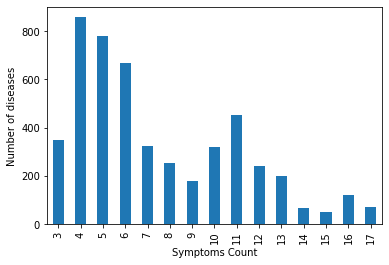

In [108]:
#Plot number of symptoms per disease count
symptomsCount = pd.DataFrame(dataframe.apply(lambda x: x.count()-1, axis=1))
symptomsCount.columns = ['Number Of Symptoms']
symptomsCount.groupby('Number Of Symptoms')['Number Of Symptoms'].count().plot(kind='bar')
plt.xlabel('Symptoms Count')
plt.ylabel('Number of diseases')

In [138]:
symptomsCount.columns = ['count']
#Concat initial dataframe and count data frame
tempDataFrame = pd.concat([dataframe, symptomsCount], axis = 1).reset_index()
#Drop the index column that was inherit during concat process
finalDataFrame = tempDataFrame.drop(['index'], axis = 1)
#Drop all rows that has count more than 4
finalDataFrame = finalDataFrame[finalDataFrame['count'] <= 4]
finalDataFrame

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,count
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,Gastroenteritis,vomiting,sunken_eyes,dehydration,diarrhoea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4892,Paralysis (brain hemorrhage),vomiting,headache,weakness_of_one_body_side,altered_sensorium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4908,Heart attack,vomiting,breathlessness,sweating,chest_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [141]:
#See which disease has 3 or 4 symptoms
finalDataFrame.groupby(['count', 'Disease']).Disease.count().unstack(fill_value=0).astype(bool).astype(int)

Disease,AIDS,Acne,Allergy,Arthritis,Cervical spondylosis,Dimorphic hemmorhoids(piles),Drug Reaction,Fungal infection,Gastroenteritis,Heart attack,Hypertension,Impetigo,Paralysis (brain hemorrhage),Urinary tract infection
count,,,,,,,,,,,,,,
3,1,1,1,0,0,0,0,1,1,1,0,0,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [142]:
#Extract Column 1-5
finalDataFrame = finalDataFrame.iloc[:,0:5]
finalDataFrame

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN
...,...,...,...,...,...
4887,Gastroenteritis,vomiting,sunken_eyes,dehydration,diarrhoea
4892,Paralysis (brain hemorrhage),vomiting,headache,weakness_of_one_body_side,altered_sensorium
4908,Heart attack,vomiting,breathlessness,sweating,chest_pain
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring


In [120]:
#This step is done for Weka
col_name="Disease"
first_col = finalDataFrame.pop(col_name)
finalDataFrame.insert(4, col_name, first_col)
finalDataFrame

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Disease
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,Fungal infection
1,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,Fungal infection
2,itching,nodal_skin_eruptions,dischromic _patches,NaN,Fungal infection
3,itching,skin_rash,dischromic _patches,NaN,Fungal infection
4,itching,skin_rash,nodal_skin_eruptions,NaN,Fungal infection
...,...,...,...,...,...
4887,vomiting,sunken_eyes,dehydration,diarrhoea,Gastroenteritis
4892,vomiting,headache,weakness_of_one_body_side,altered_sensorium,Paralysis (brain hemorrhage)
4908,vomiting,breathlessness,sweating,chest_pain,Heart attack
4916,skin_rash,pus_filled_pimples,blackheads,scurring,Acne


In [121]:
#Output in an excel document
finalDataFrame.to_excel("processed-data-in-jupyter.xlsx", index = False);

Text(0, 0.5, 'Count')

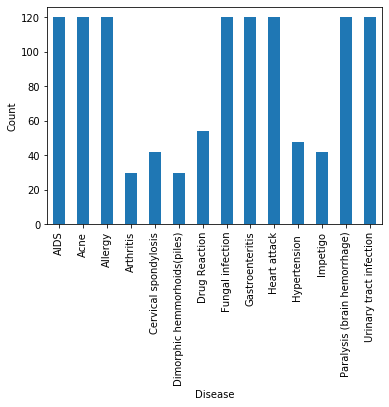

In [122]:
#Count per disease
finalDataFrame.groupby('Disease').Disease.count().plot(kind = 'bar')
plt.xlabel('Disease')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

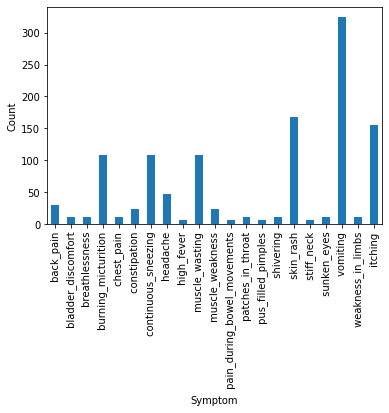

In [123]:
#Count per Symptom 1
finalDataFrame.groupby('Symptom_1').Symptom_1.count().plot(kind = 'bar')
plt.xlabel('Symptom')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

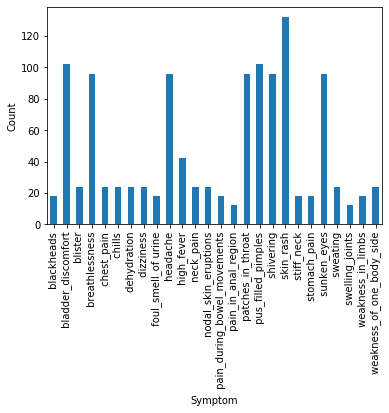

In [124]:
#Count per Symptom 2
finalDataFrame.groupby('Symptom_2').Symptom_2.count().plot(kind = 'bar')
plt.xlabel('Symptom')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

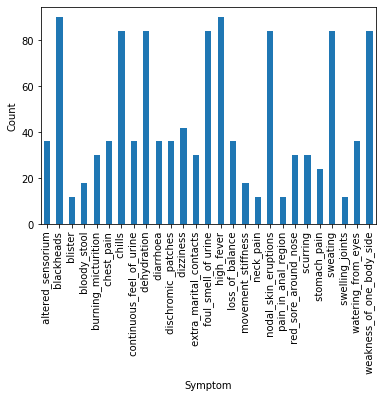

In [125]:
#Count per Symptom 3
finalDataFrame.groupby('Symptom_3').Symptom_3.count().plot(kind = 'bar')
plt.xlabel('Symptom')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

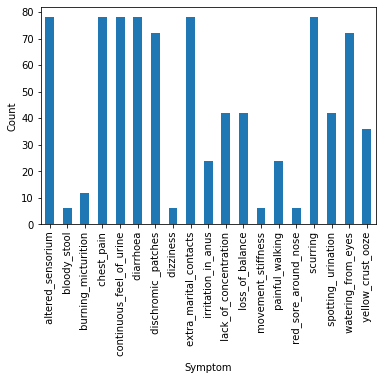

In [126]:
#Count per Symptom 4
finalDataFrame.groupby('Symptom_4').Symptom_4.count().plot(kind = 'bar')
plt.xlabel('Symptom')
plt.ylabel('Count')